## Example Code - CAPM Beta for a given return sample
## Single (Constant) Sample Date Window

In [7]:
# Importing necessary libraries
import pandas as pd  # library for data manipulation and analysis
import yfinance as yf  # library to download financial data from Yahoo Finance
import statsmodels.api as sm  # library for statistical models

# Defining the ticker symbols for the companies and indexes we are interested in
TICKERS= ['AMZN', 'MSFT', '^GSPC', '^IRX']

# Defining the start and end dates for the period we want to study
START_DATE = '2014-01-01'
END_DATE = '2021-12-31'

# Downloading the historical data for the selected ticker symbols over the defined period
df = yf.download(TICKERS,
                 start=START_DATE,
                 end=END_DATE,
                 adjusted=True,  # Adjusted closing price is used
                 progress=False)  # Download progress will not be displayed

# Processing the downloaded data:
# - Selecting the adjusted closing prices
# - Resampling the data to a weekly frequency, selecting the last price for each week
# - Calculating the percentage change week by week
# - Dropping any rows with missing values
X = df['Adj Close'].resample('W') \
                   .last() \
                   .pct_change() \
                   .dropna()

# Defining Retx as the returns of Amazon's stock
Retx = X['AMZN']

# Defining Rm_Rf as the excess return of the S&P 500 index over the 13 Week Treasury Bill (risk-free rate)
# The risk-free rate is annual, so it is divided by 52 to get the weekly rate
Rm_Rf = X['^GSPC']- X['^IRX']*0.01/52

# Adding a constant to our independent variables for our regression analysis
Rm_Rf = sm.add_constant(Rm_Rf).rename(columns={'const' : 'Constant', 0: 'Rm_Rf'})

# Fitting an ordinary least squares (OLS) regression model
capm_model = sm.OLS(Retx, Rm_Rf).fit()

# Printing the summary of the regression model
print(capm_model.summary())


                            OLS Regression Results                            
Dep. Variable:                   AMZN   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     129.5
Date:                Thu, 06 Jul 2023   Prob (F-statistic):           2.69e-26
Time:                        13:49:50   Log-Likelihood:                 816.10
No. Observations:                 417   AIC:                            -1628.
Df Residuals:                     415   BIC:                            -1620.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Constant       0.0038      0.002      2.221      0.0

### Rolling Window Estimates: The idea is to repeat the beta estimation over different sub-samples
##### One can repeat the regression over a series of subsamples generated with a while- or for- loop
#####  Or there is a module to quickly run rolling regression

<AxesSubplot:title={'center':'Rolling Beta Estimate'}, xlabel='Date'>

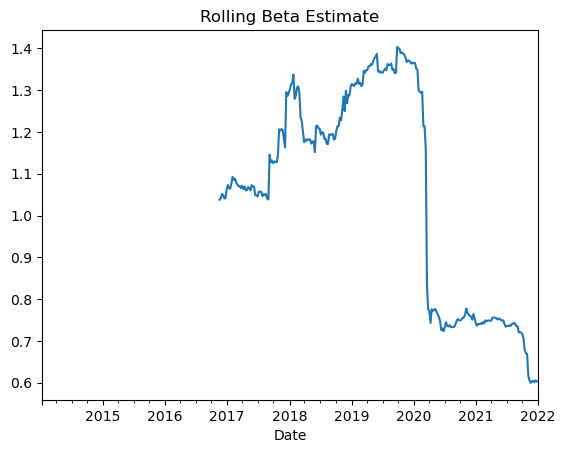

In [8]:
# Importing necessary libraries for the rolling regression
from statsmodels.regression.rolling import RollingOLS

# Defining a RollingOLS model
# 'window=150' means that the model will use the most recent 150 observations for each estimate
rols = RollingOLS(Retx, Rm_Rf, window=150)

# Fitting the model and saving the results
rolling_coefficients = rols.fit().params

# Displaying the rolling coefficients
rolling_coefficients

# Plotting the rolling beta estimates (coefficients of 'Rm_Rf' variable)
rolling_coefficients['Rm_Rf'].plot(title ='Rolling Beta Estimate')
